In [24]:
# Import

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np




In [25]:
# 0)
# a)

data_iris = load_iris()

print(data_iris.keys())

print(data_iris["target_names"])
names_list = data_iris["target_names"]
names_list




dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
# b) 
data_iris = load_iris(return_X_y=True, as_frame=True)
data_iris_df = pd.DataFrame(data_iris[0])
data_iris_df["species"] = data_iris[1]

data_iris_df.insert(5, "species_name",[names_list[0]if species == 0 else names_list[1] if species == 1 else names_list[2] for species in data_iris_df["species"]])


In [27]:
data_iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'species_name'],
      dtype='object')

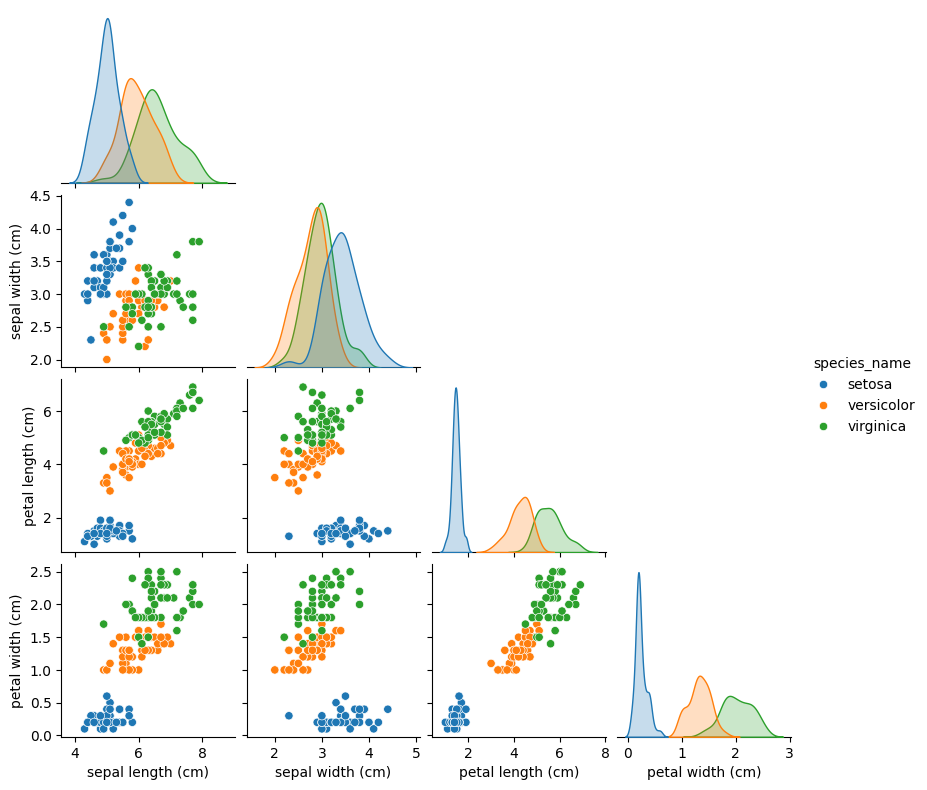

In [28]:

sns.pairplot(data_iris_df, vars=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"], corner=True, height=2, hue="species_name")



<Axes: >

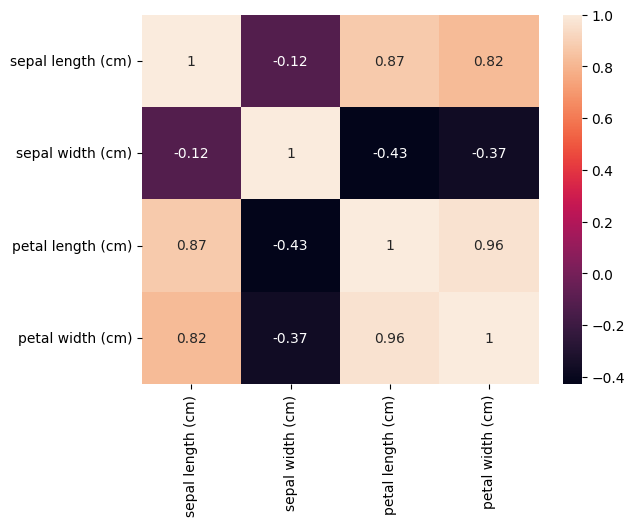

In [29]:
# D)
# Show us how cloe the diffrent variabels are correlated to one an other. The closer to 1 , the higher correlation
# and closer to -1 the smaller correlation. 

sns.heatmap(data_iris_df.iloc[:, :4].corr(numeric_only=True), annot=True)

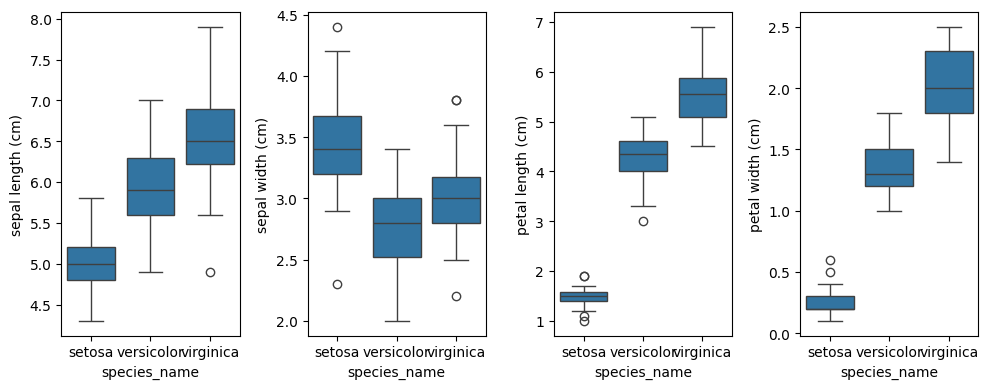

In [30]:
# e)

fig, ax = plt.subplots(1, 4, dpi=100, figsize = (10,4))

for axe, col in zip(ax, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']):
    sns.boxplot(data= data_iris_df, x="species_name", y=col, ax=axe)
plt.tight_layout()

In [31]:
names_list

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
# f)

for cat in names_list:
    df_outliers = data_iris_df[data_iris_df.species_name == cat]
    for col in data_iris_df.iloc[:, :4]:

        Q1 = df_outliers[col].quantile(0.25)
        Q3 = df_outliers[col].quantile(0.75)

        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        lower_list = df_outliers[df_outliers[col] < lower].index
        upper_list = df_outliers[df_outliers[col] > upper].index
        
        data_iris_df.drop(index=lower_list,inplace=True, errors="ignore")
        data_iris_df.drop(index=upper_list,inplace=True, errors="ignore")

        data_iris_df.reset_index(drop=True, inplace=True)
        
        

In [33]:
data_iris_df.value_counts("species_name")


species_name
versicolor    49
virginica     46
setosa        42
Name: count, dtype: int64

In [34]:
# 1) 
scaler_STD = StandardScaler()
X, y = data_iris_df.drop(["species", "species_name"], axis=1), data_iris_df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

Scaled_X_train = scaler_STD.fit_transform(X_train)
Scaled_X_test = scaler_STD.transform(X_test)

In [35]:
# 2)

logistic_model = LogisticRegressionCV(Cs=10, cv=5, penalty="l2", solver="lbfgs", max_iter=1000)

logistic_model.fit(Scaled_X_train, y_train)
y_pred = logistic_model.predict(Scaled_X_test)

print(logistic_model.coef_)



[[-1.35775634  1.44106522 -2.19041747 -2.04114384]
 [ 0.51822978 -0.30103904 -0.6924435  -0.85953445]
 [ 0.83952656 -1.14002617  2.88286098  2.90067828]]


In [36]:
# 3)
# a)
y_pred[:10], y_test[:10]

(array([2, 2, 0, 0, 2, 1, 2, 2, 2, 1]),
 105    2
 104    2
 12     0
 26     0
 123    2
 66     1
 64     1
 115    2
 133    2
 85     1
 Name: species, dtype: int64)

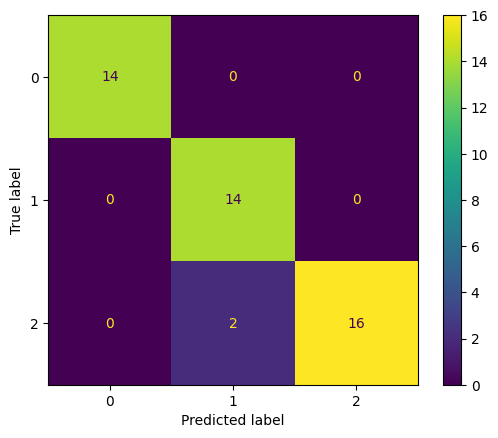

In [37]:
#b)

cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [38]:
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      1.00      0.93        14
           2       1.00      0.89      0.94        18

    accuracy                           0.96        46
   macro avg       0.96      0.96      0.96        46
weighted avg       0.96      0.96      0.96        46



In [ ]:
K_folder = KFold(shuffle=True, random_state=42, n_splits=10)
K_folder.get_n_splits(X, y)

for i, (X_train_index, X_test_index) in enumerate(K_folder.split(X, y)):
    k_X_train, k_y_train = X.iloc[X_train_index], y.iloc[X_train_index]
    k_X_test, k_y_test = X.iloc[X_test_index], y.iloc[X_test_index]
   
    Scaled_X_train = scaler_STD.fit_transform(k_X_train)
    Scaled_X_test = scaler_STD.transform(k_X_test)
    
    logistic_model.fit(Scaled_X_train, k_y_train)
    y_pred = logistic_model.predict(Scaled_X_test)
